In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
buildings = gpd.read_parquet("/data/uscuni-ulce/boundaries_of_change/classification/")

In [3]:
gpd.list_layers("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg")

,name,geometry_type
0,1240_mongol_invasion,Polygon
1,900_political,Polygon
2,1000_political,Polygon
3,1300_ostsiedlung,Polygon
4,1550_religion,Polygon
5,1526_political,Polygon
6,1618_political,Polygon
7,1648_political,Polygon
8,1600_religion,Polygon
9,1812_political,Polygon


In [4]:
boundaries = gpd.read_file("/data/uscuni-ulce/boundaries_of_change/impact_boundaries.gpkg", layer="1960_political")
boundaries= boundaries[boundaries.NAME != "Hungary"]

In [5]:
buildings.head()

,geometry,final_without_noise,area
__null_dask_index__,,,
0,POINT (4099683.344 3108236.287),50,66.767646
1,POINT (4100189.13 3108803.392),1,427.019080
2,POINT (4100069.189 3109146.3),1,144.324859
3,POINT (4100144.944 3108299.666),1,139.581363
4,POINT (4100022.946 3108688.179),1,41.651016


In [6]:
final_clusters = pd.read_parquet(
    "/data/uscuni-ulce/processed_data/clusters/cluster_mapping_v3.pq"
)
final_clusters

,1,2,3,4,5,6
7,,,,,,
1,1,1,1,1,1,1
2,1,1,1,1,1,1
3,1,1,1,1,1,2
4,1,1,1,1,1,2
5,1,1,1,1,2,3
...,...,...,...,...,...,...
104,2,4,8,16,31,59
105,2,4,8,16,31,59
106,2,4,8,16,32,60


In [7]:
level_columns = []

In [8]:
for level in final_clusters.columns:
    buildings[f"level_{level}"] = buildings.final_without_noise.map(
        final_clusters[level]
    )
    level_columns.append(f"level_{level}")

In [9]:
buildings.head()

,geometry,final_without_noise,area,level_1,level_2,level_3,level_4,level_5,level_6
__null_dask_index__,,,,,,,,,
0,POINT (4099683.344 3108236.287),50,66.767646,1,2,4,8,16,30
1,POINT (4100189.13 3108803.392),1,427.019080,1,1,1,1,1,1
2,POINT (4100069.189 3109146.3),1,144.324859,1,1,1,1,1,1
3,POINT (4100144.944 3108299.666),1,139.581363,1,1,1,1,1,1
4,POINT (4100022.946 3108688.179),1,41.651016,1,1,1,1,1,1


In [10]:
boundaries.explore()

In [11]:
boundaries.head()

,NAME,NOTES,geometry
0,West Germany,None,"MULTIPOLYGON (((4351305.316 3476171.174, 43440..."
1,Czechoslovakia,None,"MULTIPOLYGON (((4630531.409 3110893.427, 46357..."
2,Austria,None,"MULTIPOLYGON (((4355225.354 2715902.995, 43542..."
3,East Germany,None,"MULTIPOLYGON (((4473567.692 3024891.982, 44575..."
4,Poland,None,"MULTIPOLYGON (((4922206.626 3502100.945, 49317..."


In [12]:
joined = gpd.sjoin(buildings, boundaries, how="left", predicate="within")
joined.head()

,geometry,final_without_noise,area,level_1,level_2,level_3,level_4,level_5,level_6,index_right,NAME,NOTES
__null_dask_index__,,,,,,,,,,,,
0,POINT (4099683.344 3108236.287),50,66.767646,1,2,4,8,16,30,0.0,West Germany,None
1,POINT (4100189.13 3108803.392),1,427.019080,1,1,1,1,1,1,0.0,West Germany,None
2,POINT (4100069.189 3109146.3),1,144.324859,1,1,1,1,1,1,0.0,West Germany,None
3,POINT (4100144.944 3108299.666),1,139.581363,1,1,1,1,1,1,0.0,West Germany,None
4,POINT (4100022.946 3108688.179),1,41.651016,1,1,1,1,1,1,0.0,West Germany,None


In [13]:
grouped = joined.groupby("NAME")["level_4"].value_counts()

In [14]:
cnt_table = pd.DataFrame(grouped.unstack().fillna(0).T)
cnt_table = cnt_table.drop([3,4,10])
cnt_table

NAME,Austria,Czechoslovakia,East Germany,Poland,West Germany
level_4,,,,,
1,295882.0,863579.0,1492206.0,600894.0,8177983.0
2,97407.0,71026.0,323224.0,41404.0,699554.0
5,526396.0,855001.0,1497608.0,1457583.0,1553502.0
6,58910.0,316490.0,1020521.0,117546.0,9646126.0
7,519449.0,853600.0,1487431.0,421834.0,5377804.0
8,409896.0,1052377.0,2312078.0,553595.0,8397958.0
9,176053.0,178496.0,16735.0,2822365.0,90285.0
11,363.0,55729.0,15482.0,742410.0,34532.0
12,9744.0,268776.0,262756.0,1801896.0,168859.0


In [15]:
region_building_sums = cnt_table.sum(axis=0)
cnt_table_norm = cnt_table.div(region_building_sums, axis=1)
cnt_table_norm.sum()

NAME
Austria           1.0
Czechoslovakia    1.0
East Germany      1.0
Poland            1.0
West Germany      1.0
dtype: float64

In [16]:
import scipy.stats as stats
from scipy.spatial import distance
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Bray-Curtis

In [17]:
cnt_table_norm.iloc[:,0]

level_4
1     0.067609
2     0.022257
5     0.120281
6     0.013461
7     0.118694
8     0.093661
9     0.040228
11    0.000083
12    0.002227
13    0.443387
14    0.057529
15    0.014902
16    0.005681
Name: Austria, dtype: float64

In [18]:
num_regions = len(cnt_table_norm.columns)

In [19]:
bray_curtis_matrix = np.zeros((num_regions, num_regions))

In [20]:
for i in range(num_regions):
    for j in range(num_regions):
        if i != j:
            reg_i = cnt_table_norm.iloc[:,i]
            reg_j = cnt_table_norm.iloc[:,j]
            bray_curtis_matrix[i,j] = distance.braycurtis(reg_i, reg_j)

In [21]:
bray_curtis_matrix

array([[0.        , 0.23169569, 0.45636243, 0.40361692, 0.5236461 ],
       [0.23169569, 0.        , 0.27744152, 0.32314523, 0.40043533],
       [0.45636243, 0.27744152, 0.        , 0.58333724, 0.25932335],
       [0.40361692, 0.32314523, 0.58333724, 0.        , 0.70557349],
       [0.5236461 , 0.40043533, 0.25932335, 0.70557349, 0.        ]])

In [22]:
bray_curtis_matrix = pd.DataFrame(bray_curtis_matrix, index=cnt_table_norm.columns, columns=cnt_table_norm.columns)
bray_curtis_matrix

NAME,Austria,Czechoslovakia,East Germany,Poland,West Germany
NAME,,,,,
Austria,0.000000,0.231696,0.456362,0.403617,0.523646
Czechoslovakia,0.231696,0.000000,0.277442,0.323145,0.400435
East Germany,0.456362,0.277442,0.000000,0.583337,0.259323
Poland,0.403617,0.323145,0.583337,0.000000,0.705573
West Germany,0.523646,0.400435,0.259323,0.705573,0.000000


<Axes: xlabel='NAME', ylabel='NAME'>

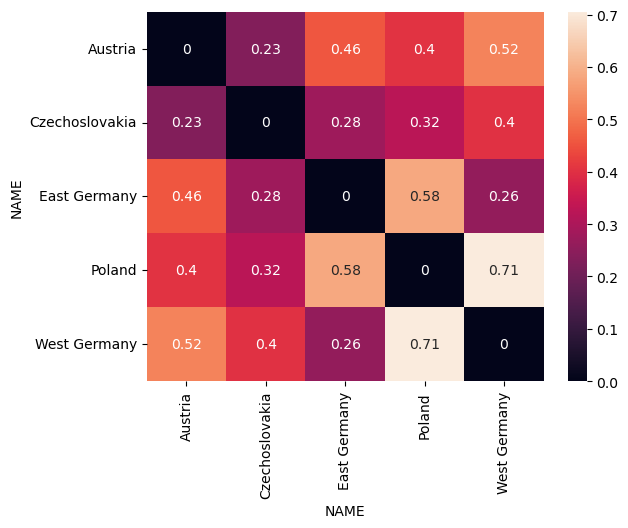

In [23]:
sns.heatmap(bray_curtis_matrix, annot=True)

<Axes: >

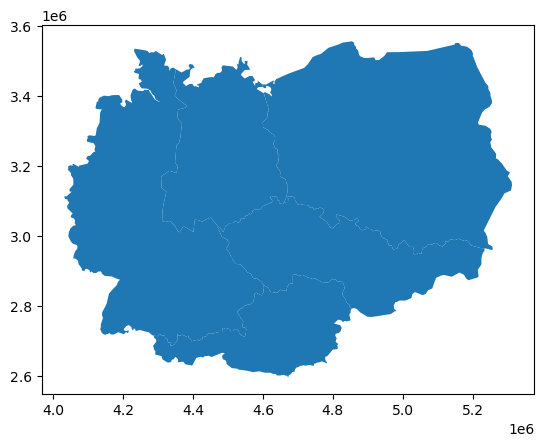

In [24]:
boundaries.plot()

In [25]:
boundaries

,NAME,NOTES,geometry
0,West Germany,None,"MULTIPOLYGON (((4351305.316 3476171.174, 43440..."
1,Czechoslovakia,None,"MULTIPOLYGON (((4630531.409 3110893.427, 46357..."
2,Austria,None,"MULTIPOLYGON (((4355225.354 2715902.995, 43542..."
3,East Germany,None,"MULTIPOLYGON (((4473567.692 3024891.982, 44575..."
4,Poland,None,"MULTIPOLYGON (((4922206.626 3502100.945, 49317..."


In [37]:
import topojson as tp

In [49]:
test = tp.Topology(boundaries)

In [50]:
type(test)

topojson.core.topology.Topology

In [53]:
test

Topology(
{'arcs': [[[34490, 44727], [-230, 14]],
          [[19978, 12406],
           [-304, 93],
           [-753, 872],
           [-1147, 378],
           [-883, 338],
           [-921, -320],
           [-118, 519],
           [-234, 253],
           [-198, -135],
           [88, -386],
           [-395, 207],
           [-128, 730],
           [-525, 539],
           [-208, 29],
           [-94, -106],
           [-309, -195],
           [-550, -865],
           [49, -322],
           [467, -281],
           [581, 214],
           [-74, -732],
           [-193, -66],
           [-289, 336],
           [-518, -683],
           [-1233, 589],
           [-1081, -682],
           [-647, 43],
           [-164, 372],
           [-1072, -501],
           [-462, 270],
           [-257, 344],
           [-380, 1076],
           [170, 712],
           [-44, 582],
           [494, 2033],
           [-207, 821],
           [43, 858],
           [-1, 39],
           [640, 1572],
           [

In [63]:
test = test.to_json()

In [68]:
test[1]

'"'

## Principal Coordinates visualization

In [24]:
from skbio.stats.ordination import pcoa
from skbio.stats.distance import DistanceMatrix

In [25]:
pcoa_res = pcoa(DistanceMatrix(bray_curtis_matrix, ids=cnt_table_norm.columns))

In [26]:
pcoa_res_df = pd.DataFrame(pcoa_res.samples.iloc[:, :2], index=cnt_table_norm.columns)

In [27]:
pcoa_res_df

,PC1,PC2
NAME,,
Austria,-0.131978,0.210060
Czechoslovakia,-0.051598,-0.013323
East Germany,0.205911,-0.085319
Poland,-0.357217,-0.118359
West Germany,0.334882,0.006941


<Axes: xlabel='PC1', ylabel='PC2'>

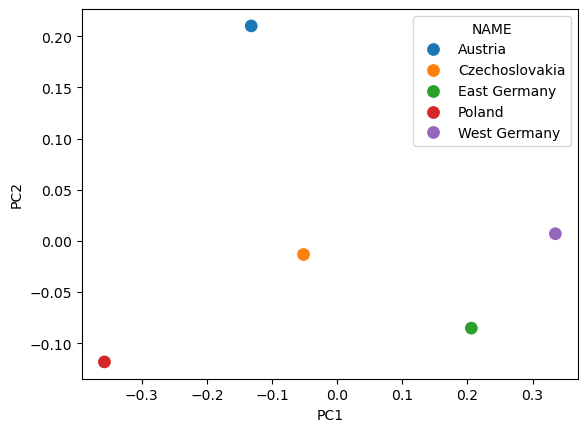

In [28]:
sns.scatterplot(x="PC1", y="PC2", hue=pcoa_res_df.index, data=pcoa_res_df, s=100)